* [Bike Sharing Demand | Kaggle](https://www.kaggle.com/competitions/bike-sharing-demand)

## 필요한 라이브러리 로드

In [1]:
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot 을 로드합니다. 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 데이터셋 로드

In [2]:
%ls data/bike-sharing-demand/

sampleSubmission.csv  test.csv              train.csv


In [3]:
train = pd.read_csv("data/bike-sharing-demand/train.csv")
train.shape

(10886, 12)

In [4]:
test = pd.read_csv("data/bike-sharing-demand/test.csv")
test.shape

(6493, 9)

In [5]:
train.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [6]:
test.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000


## 전처리
* 연, 월, 일, 시, 분, 초 만들기

In [7]:
# df["datetime"].head(1)

In [8]:
df = pd.concat([train, test]).reset_index(drop=True)
df["datetime"] = pd.to_datetime(df["datetime"])
df["year"] = df["datetime"].dt.year
df["month"] = df["datetime"].dt.month
df["day"] = df["datetime"].dt.day
df["hour"] = df["datetime"].dt.hour
df["minute"] = df["datetime"].dt.minute
df["second"] = df["datetime"].dt.second
df["dayofweek"] = df["datetime"].dt.dayofweek

In [9]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0,2011,1,1,4,0,0,5


## EDA

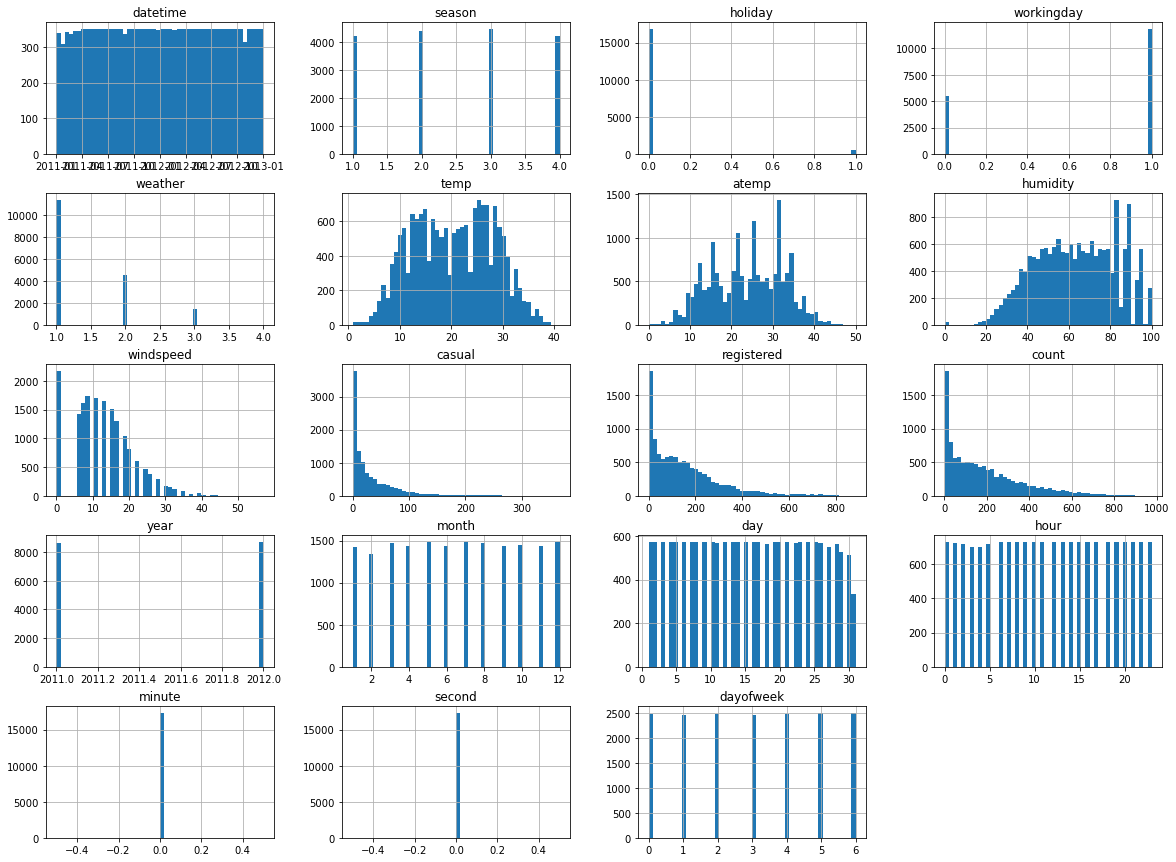

In [10]:
_ = df.hist(figsize=(20, 15), bins=50)

In [11]:
df[df["windspeed"] == 0].shape

(2180, 19)

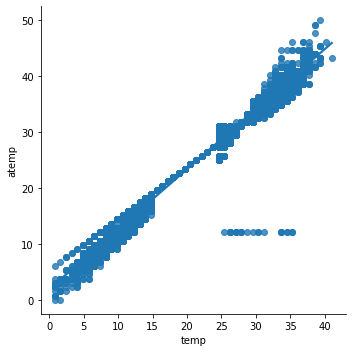

In [12]:
sns.lmplot(data=df, x="temp", y="atemp")

In [13]:
df[(df["temp"] > 20) & (df["atemp"] < 15)].shape

(24, 19)

In [14]:
# df[(df["temp"] > 20) & (df["atemp"] < 15)]

<AxesSubplot:xlabel='year', ylabel='count'>

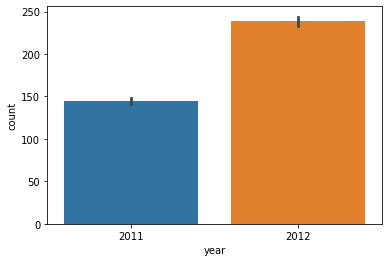

In [15]:
sns.barplot(data=df, x="year", y="count")

<AxesSubplot:xlabel='month', ylabel='count'>

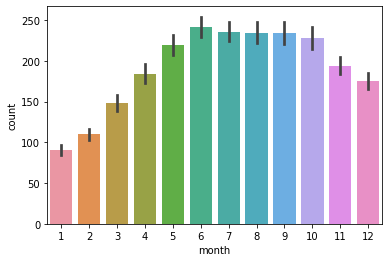

In [16]:
sns.barplot(data=df, x="month", y="count")

<AxesSubplot:xlabel='month', ylabel='count'>

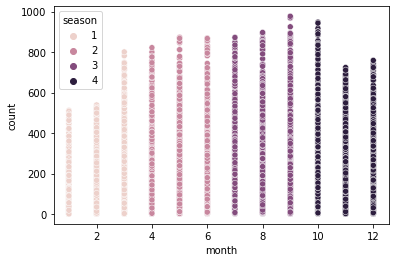

In [58]:
sns.scatterplot(data=df, x="month", y="count", hue = 'season')

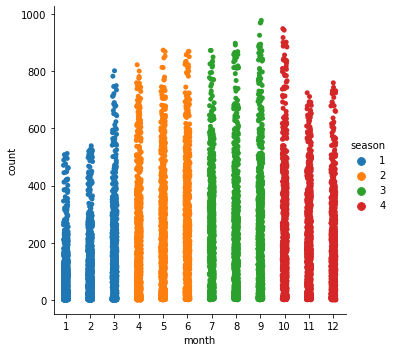

In [62]:
sns.catplot(data=df, x="month", y="count", hue = 'season')

<AxesSubplot:xlabel='day', ylabel='count'>

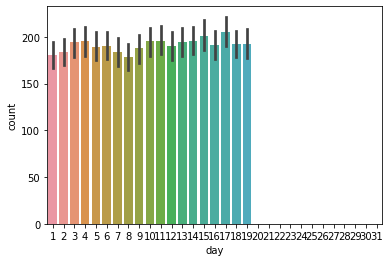

In [17]:
sns.barplot(data=df, x="day", y="count")

<AxesSubplot:xlabel='hour', ylabel='count'>

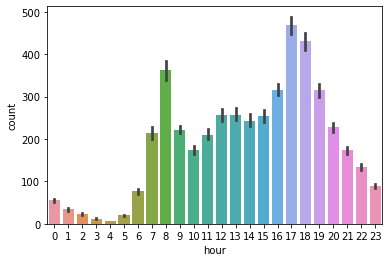

In [18]:
sns.barplot(data=df, x="hour", y="count")

<AxesSubplot:xlabel='dayofweek', ylabel='count'>

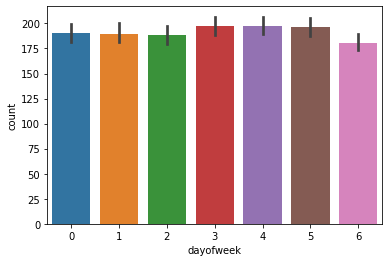

In [19]:
sns.barplot(data=df, x="dayofweek", y="count")

<AxesSubplot:xlabel='hour', ylabel='count'>

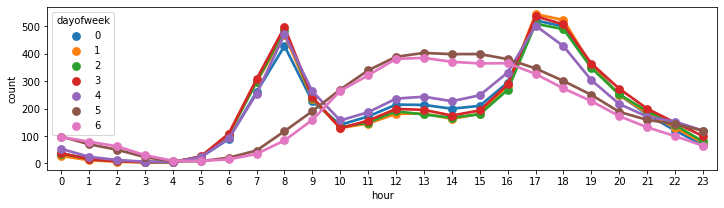

In [20]:
plt.figure(figsize=(12, 3))
sns.pointplot(data=df, x="hour", y="count", hue="dayofweek", ci=None)

<AxesSubplot:xlabel='hour', ylabel='count'>

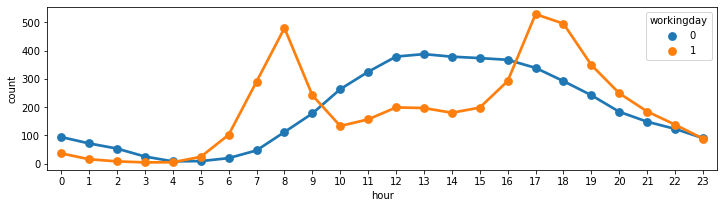

In [21]:
plt.figure(figsize=(12, 3))
sns.pointplot(data=df, x="hour", y="count", hue="workingday", ci=None)

<AxesSubplot:xlabel='hour', ylabel='count'>

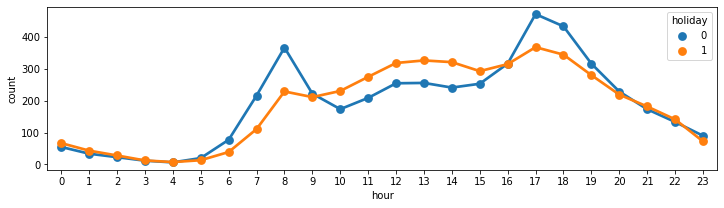

In [22]:
plt.figure(figsize=(12, 3))
sns.pointplot(data=df, x="hour", y="count", hue="holiday", ci=None)

<AxesSubplot:xlabel='hour', ylabel='count'>

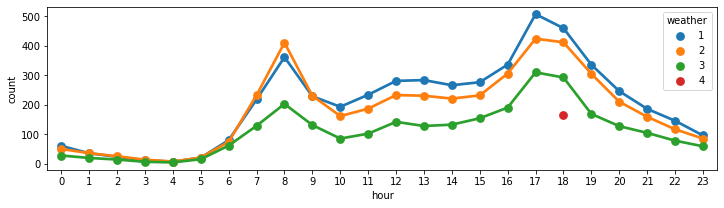

In [23]:
plt.figure(figsize=(12, 3))
sns.pointplot(data=df, x="hour", y="count", hue="weather", ci=None)

<AxesSubplot:xlabel='hour', ylabel='count'>

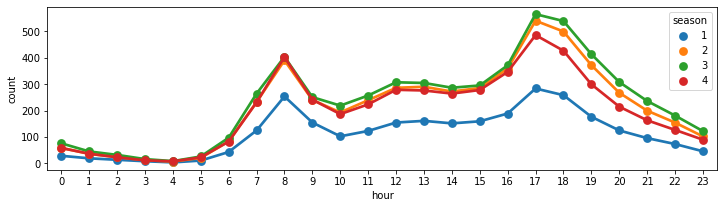

In [24]:
plt.figure(figsize=(12, 3))
sns.pointplot(data=df, x="hour", y="count", hue="season", ci=None)

In [25]:
df[df["weather"] == 4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
5631,2012-01-09 18:00:00,1,0,1,4,8.20,11.365,86,6.0032,6.0,158.0,164.0,2012,1,9,18,0,0,0
11040,2011-01-26 16:00:00,1,0,1,4,9.02,9.850,93,22.0028,NaN,NaN,NaN,2011,1,26,16,0,0,2
14134,2012-01-21 01:00:00,1,0,0,4,5.74,6.820,86,12.9980,NaN,NaN,NaN,2012,1,21,1,0,0,5


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   holiday     17379 non-null  int64         
 3   workingday  17379 non-null  int64         
 4   weather     17379 non-null  int64         
 5   temp        17379 non-null  float64       
 6   atemp       17379 non-null  float64       
 7   humidity    17379 non-null  int64         
 8   windspeed   17379 non-null  float64       
 9   casual      10886 non-null  float64       
 10  registered  10886 non-null  float64       
 11  count       10886 non-null  float64       
 12  year        17379 non-null  int64         
 13  month       17379 non-null  int64         
 14  day         17379 non-null  int64         
 15  hour        17379 non-null  int64         
 16  minute      17379 non-

## 학습, 예측 데이터셋 만들기

<img src="https://i.imgur.com/yvBtRtJ.png" width="600">


* feature_names : 학습(훈련), 예측에 사용할 컬럼을 리스트 형태로 만들어서 변수에 담아줍니다.
* label_name : 정답값

* X_train : feature_names 에 해당되는 컬럼만 train에서 가져옵니다.
    * 학습(훈련)에 사용할 데이터셋 예) 시험의 기출문제

* X_test : feature_names 에 해당되는 컬럼만 test에서 가져옵니다.
    * 예측에 사용할 데이터셋 예) 실전 시험문제

* y_train : label_name 에 해당 되는 컬럼만 train에서 가져옵니다.
    * 학습(훈련)에 사용할 정답 값 예) 기출문제의 정답

* model : 학습, 예측에 사용할 머신러닝 알고리즘

* model.fit(X_train, y_train) : 학습(훈련), 기출문제와 정답을 가지고 학습(훈련)하는 과정과 유사합니다.

* model.predict(X_test) :  예측, 실제 시험을 보는 과정과 유사합니다. => 문제를 풀어서 정답을 구합니다.

* score
    * 시험을 봤다면 몇 문제를 맞고 틀렸는지 채점해 봅니다.
* metric
    * 점수를 채점하는 공식입니다. (예를 들어 학교에서 중간고사를 봤다면 전체 평균을 계산해 줍니다.)

* submit
    * sample_submission file을 불러옵니다.
    * 예측한 값을 옮겨 적습니다.
    * 캐글에 제출합니다.

In [27]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second', 'dayofweek'],
      dtype='object')

In [28]:
# label_name : 정답값
label_name = "count"
label_name

'count'

In [29]:
# feature_names : 학습, 예측에 사용할 컬럼명(변수)
feature_names = df.columns.tolist()
feature_names.remove(label_name)
feature_names.remove("casual")
feature_names.remove("registered")
feature_names.remove("datetime")
feature_names.remove("minute")
feature_names.remove("second")
feature_names.remove("atemp")
feature_names.remove("month")
feature_names.remove("day")
feature_names

['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'humidity',
 'windspeed',
 'year',
 'hour',
 'dayofweek']

In [30]:
# 학습(훈련)에 사용할 데이터셋 예) 시험의 기출문제

X_train = df.loc[df["count"].notnull(), feature_names]
X_train.shape

(10886, 10)

In [31]:
# 예측 데이터셋, 예) 실전 시험 문제
X_test = df.loc[df["count"].isnull(), feature_names]
X_test.shape

(6493, 10)

In [32]:
# 학습(훈련)에 사용할 정답값 예) 기출문제의 정답
y_train = df.loc[df["count"].notnull(), label_name]
y_train.shape

(10886,)

## 머신러닝 알고리즘

In [33]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model

RandomForestRegressor(random_state=42)

## 교차검증
<img src="https://i.imgur.com/CSrSEig.png">

In [34]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_s

In [35]:
# 모의고사를 풀어서 답을 구하는 과정과 유사합니다.
from sklearn.model_selection import cross_validate

cross_validate(model, X_train, y_train, cv=5, scoring="neg_mean_squared_error")

{'fit_time': array([1.61894393, 1.56925678, 1.56660008, 1.54529285, 1.55453014]),
 'score_time': array([0.02943206, 0.0223093 , 0.02545381, 0.02539015, 0.02668309]),
 'test_score': array([-7101.27562312, -2937.97091427, -6345.81427634, -4620.01303684,
        -5528.14795323])}

In [36]:
from sklearn.model_selection import cross_val_predict

y_valid_predict = cross_val_predict(model, X_train, y_train, cv=5, n_jobs=-1)
y_valid_predict[:10]

array([ 67.55,  58.71,  48.23,  18.55,   5.87,   3.79,   7.12,  32.36,
        69.39, 154.01])

## 평가
### MAE(Mean Absolute Error)

In [37]:
# mean_absolute_error

In [38]:
np.abs(y_train - y_valid_predict).mean()

48.365034373551126

In [39]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_train, y_valid_predict)

48.365034373551

### MSE(Mean Squared Error)

In [40]:
# mean_squared_error
# np.square(y_train - y_valid_predict) == (y_train - y_valid_predict) ** 2

In [41]:
mse = np.square(y_train - y_valid_predict).mean()
mse

5306.809217572668

In [42]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_train, y_valid_predict)
mse

5306.809217572676

### RMSE(Root Mean Squared Error)

In [43]:
np.sqrt(mse)

72.84784978002217

### RMSLE(Root Mean Squared Logarithmic Error)


<img src="https://upload.wikimedia.org/wikipedia/commons/8/81/Logarithm_plots.png" width="300">


로그(log)는 지수 함수의 역함수이다. 어떤 수를 나타내기 위해 고정된 밑을 몇 번 곱하여야 하는지를 나타낸다고 볼 수 있다.

이른 17세기에 곱하기 및 나누기의 계산을 간편하게 해내기 위해 존 네이피어가 발명한 것으로 알려져 있다. 복잡한 단위의 계산을 간편하게 계산할 수 있다는 장점 때문에, 로그표 및 계산자 등의 발명품과 함께 세계적으로 여러 분야의 학자들에게 널리 퍼졌다.

지수에 대비된다는 의미에서 중국과 일본에서는 대수(對數)로 부르기도 하나, 대수(代數, algebra)와 헷갈리기 쉬우므로 로그라는 용어를 사용하는 것이 일반적이다.


* https://en.wikipedia.org/wiki/Logarithm
* [로그 (수학) - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EB%A1%9C%EA%B7%B8_(%EC%88%98%ED%95%99))
* [자연로그 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%9E%90%EC%97%B0%EB%A1%9C%EA%B7%B8)
* [상용로그 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%83%81%EC%9A%A9%EB%A1%9C%EA%B7%B8)

<AxesSubplot:xlabel='count', ylabel='Density'>

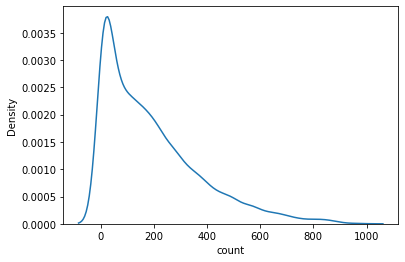

In [44]:
sns.kdeplot(y_train)

<AxesSubplot:ylabel='Density'>

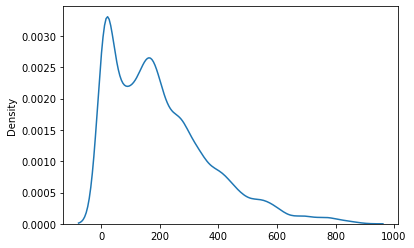

In [45]:
sns.kdeplot(y_valid_predict)

In [46]:
np.sqrt(np.square(np.log(y_train + 1) - np.log(y_valid_predict + 1)).mean())

0.5035478605975805

In [47]:
rmsle = (((np.log1p(y_train) - np.log1p(y_valid_predict)) ** 2).mean()) ** 0.5 
rmsle

0.5035478605975804

## 학습과 예측

In [48]:
y_predict = model.fit(X_train, y_train).predict(X_test)
y_predict[:10]

array([ 11.71,   4.83,   4.62,   3.2 ,   3.03,   6.2 ,  38.86, 108.1 ,
       244.49, 138.32])

<AxesSubplot:>

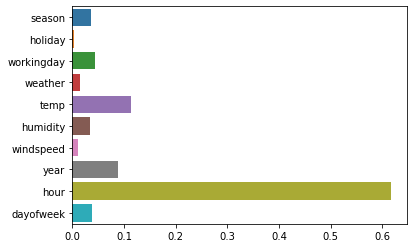

In [49]:
# 피처의 중요도
sns.barplot(x=model.feature_importances_, y=feature_names)

## 제출

In [50]:
# 답안지 양식을 불러옵니다.
df_submit = pd.read_csv("data/bike-sharing-demand/sampleSubmission.csv")
df_submit.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [51]:
# 예측한 값을 답안지에 옮겨 적습니다.
df_submit["count"] = y_predict
df_submit.head()

,datetime,count
0,2011-01-20 00:00:00,11.71
1,2011-01-20 01:00:00,4.83
2,2011-01-20 02:00:00,4.62
3,2011-01-20 03:00:00,3.20
4,2011-01-20 04:00:00,3.03


In [52]:
file_name = f"data/bike-sharing-demand/submission_{rmsle:.5f}.csv"
file_name

'data/bike-sharing-demand/submission_0.50355.csv'

In [53]:
# 캐글에 제출하기 위해 csv 파일로 저장합니다.
df_submit.to_csv(file_name, index=False)

In [54]:
# 파일 저장이 제대로 되었는지 확인합니다.
pd.read_csv(file_name)

,datetime,count
0,2011-01-20 00:00:00,11.71
1,2011-01-20 01:00:00,4.83
2,2011-01-20 02:00:00,4.62
3,2011-01-20 03:00:00,3.20
4,2011-01-20 04:00:00,3.03
...,...,...
6488,2012-12-31 19:00:00,208.02
6489,2012-12-31 20:00:00,164.26
6490,2012-12-31 21:00:00,108.63
6491,2012-12-31 22:00:00,94.65


In [55]:
# 캐글 순위
1235 / 3243

0.3808202281837805

In [56]:
# 캐글 순위
458 / 3243

0.14122725871107